## Model Selection and Optimization. Part II

- Bias-variance tradeoff 
- Regularization
- Hyperparameter tuning
- Cross-validation
- Pipelines

## 1. Bias-variance tradeoff

<img src="../images/bias_variance_1.png" alt="Bias and Variance" width="400" height="400">

<img src="../images/bias_variance_2.png" alt="Bias-Variance Tradeoff" width="400" height="400">


### Model Bias
- Bias is when a simplified model fails to recognize complex patterns.
- High bias can cause the model to miss relevant relations between features and target outputs.
- Models with high bias tend to underfit the data, resulting in high error on both the training and test datasets.
- Common in linear models and other simplistic approaches that assume strong assumptions about the data.

### Model Variance
- Variance refers to the model's sensitivity to small fluctuations in the training data.
- High variance can cause the model to capture noise in the training data, leading to overfitting.
- Models with high variance perform well on training data but poorly on test data due to overfitting.
- Common in complex models like decision trees and neural networks with many parameters.

### Models with Optimized Bias-Variance Tradeoff
- Achieving an optimal bias-variance tradeoff involves balancing model complexity with its ability to generalize to new data.
- Techniques like cross-validation, regularization, and ensemble methods are used to optimize bias-variance tradeoff. **Example:** random firest vs decision tree

### Bias and Variance vs. Underfitting and Overfittin

- **Conceptual Differences**: Bias and variance are inherent characteristics of a learning algorithm that describe how it responds to different datasets. Underfitting and overfitting are outcomes observed in specific models due to their inability to properly capture or generalize patterns in the data.
- **Model Behavior**: High bias leads to underfitting because the model is too simple to capture all patterns in the data. High variance leads to overfitting because the model is too flexible and tends to fit the training data too well, often mistaking noise for patterns.
- **TLDR** bias and variance are about the algorithm, overfit and underfit are properties of a model

### Example: Self-Driving Car

- **High-Bias Algorithm**: The car always stops when it detects an obstacle, even if there is a clear path around it. It errs on the side of caution, leading to slower progress and potentially frustrating other drivers.
- **High-Variance Algorithm**: The car reacts to obstacles in a random and uncontrollable manner. Sometimes it stops abruptly for no apparent reason, while other times it speeds up unexpectedly, making it unsafe and unreliable.
- **Optimized Algorithm**: The car handles obstacles in the most optimal way, smoothly navigating around them when possible while maintaining a safe and efficient driving speed. It balances caution with progress, providing a smooth and predictable driving experience.

## 2. Regularization

- Mathematical technique used to prevent overfitting by penalizing model complexity. It adds a penalty term to the loss function that discourages overly complex models.
- Helps suppress model variance by discouraging overly complex models that may fit the training data too closely, leading to poor generalization to new data.
- Commonly applied in machine learning algorithms such as regression, support vector machines (SVM), and neural networks to improve their generalization performance and prevent overfitting.

#### Ridge (L2)

- Adds a penalty term as the sum of the squared cofficients thus preventing the coefficients to reach arbitrarily high manitudes when the loss function is minimized:

$$Loss = MSE + \alpha\Sigma(w_i)^2$$

where $w_i$ are model coefficients and $\alpha$ is the regularization parameter

#### Lasso (L1) 

- Lasso stands for least absolute shrinkage and selection operator
- Similar to Ridge, escept the penalty term is a sum of the coefficients' absolute values 

$$Loss = MSE + \alpha\Sigma(|w_i|)$$

#### What is the difference?

- Lasso regularization is particularly effective when dealing with a small number of important features. Lasso can shrink the coefficients of irrelevant features to zero, effectively performing automatic feature selection and reducing the model's complexity.
- Ridge regularization is more appropriate when the features do not exhibit significant differences in importance.
- **Choosing Between Ridge and Lasso**: It is recommended to experiment with both ridge and lasso regularization techniques and select the one that performs better for a given dataset and problem.

### Regularization example

- We will consider a somewhat extreme example to demonstrate the effects of regularization: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data
- import `houseprices.csv`
- drop columns with large amounts of missing data; use `ffill` to fill missing data in remaining columns
- encode categorical values
- create numerical arrays X and y
- scale feature array X

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

## import regularized linear regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")#, category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [2]:
df = pd.read_csv('../data/houseprices.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
## drop columns with large amounts of missing data

df = df.drop(columns = ["Id", 'Alley', "FireplaceQu", "PoolQC", "Fence", "MiscFeature"])
df['MSSubClass'] = df['MSSubClass'].astype(str)
df['OverallCond'] = df['OverallCond'].astype(str)

In [4]:
## For the remaining columns with missing data, use ffill to impute missing values
## and then encode the categorical varibles
df = df.fillna(method = "ffill")
df = pd.get_dummies(df, drop_first=True)
df.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,2003,2003,196.0,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,1976,1976,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,2001,2002,162.0,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,1915,1970,0.0,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,2000,2000,350.0,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0


In [5]:
### Build feature and label arrays X, y, scale and split them into training and test sets

X = df.drop(columns = 'SalePrice').to_numpy()
y = df.SalePrice.to_numpy()/1000
features = df.drop(columns = 'SalePrice').columns

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
### label value distribution
(df['SalePrice']/1000).describe()

count    1460.000000
mean      180.921196
std        79.442503
min        34.900000
25%       129.975000
50%       163.000000
75%       214.000000
max       755.000000
Name: SalePrice, dtype: float64

#### Baseline model: OLS linear regression (no regularization)

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("MSE Train:  ", mean_squared_error(lr.predict(X_train), y_train))
print("MSE Test:  ", mean_squared_error(lr.predict(X_test), y_test))

MSE Train:   365.9678978337113
MSE Test:   1.0991856146493649e+22


**OLS model is significantly overfit**

- Let's explore model variance and compare model coefficients computed on different training samples (just use a few different `random_state` values in the `train_test_split` function)
- Observe variation of model coefficients from experiment to experiment

In [9]:
variance_experiment = pd.DataFrame({"exp1":lr.coef_}, index = features)

for i in range(2,11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i+10)
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    variance_experiment['exp'+str(i)] = lr.coef_
    
pd.set_option('display.float_format', '{:.1e}'.format)

var_exp_array = variance_experiment.to_numpy()
variance_experiment['mean'] = var_exp_array.mean(axis = 1)
variance_experiment['median'] = np.median(var_exp_array, axis = 1)
variance_experiment[abs(variance_experiment['mean']) > 10e10].head(20)


,exp1,exp2,exp3,exp4,exp5,exp6,exp7,exp8,exp9,exp10,mean,median
BsmtFinSF1,-2.1e+13,-7.9e+12,2.7e+12,-1.4e+13,-3.7e+13,9.3e+12,-2.1e+13,7.0e+14,5.5e+13,-3.5e+13,6.3e+13,-1.1e+13
BsmtFinSF2,-4.1e+12,-5.6e+12,1.9e+12,-3.6e+12,-9.7e+12,6.3e+12,-3.9e+12,1.8e+14,1.4e+13,-9.1e+12,1.7e+13,-3.8e+12
BsmtUnfSF,-8.5e+12,-8.2e+12,3.0e+12,-5.2e+12,-1.5e+13,9.9e+12,-7.9e+12,2.9e+14,2.3e+13,-1.4e+13,2.7e+13,-6.5e+12
TotalBsmtSF,2.2e+13,1.2e+13,-4.1e+12,1.5e+13,4.0e+13,-1.4e+13,2.2e+13,-7.6e+14,-5.9e+13,3.8e+13,-6.9e+13,1.4e+13
1stFlrSF,6.2e+11,-5.0e+12,-4.3e+12,4.2e+12,-5.0e+13,4.1e+12,-6.7e+13,3.4e+14,8.6e+12,2.2e+13,2.5e+13,2.3e+12
2ndFlrSF,2.6e+11,-4.8e+12,-3.1e+12,2.0e+12,-2.4e+13,2.7e+12,-3.2e+13,1.6e+14,4.1e+12,9.4e+12,1.2e+13,1.1e+12
LowQualFinSF,8.2e+10,-1.3e+12,-7.7e+11,5.6e+11,-6.0e+12,8.1e+11,-8.8e+12,4.6e+13,1.1e+12,2.9e+12,3.4e+12,3.2e+11
GrLivArea,-7.6e+11,9.4e+12,6.2e+12,-5.2e+12,6.0e+13,-5.5e+12,8.2e+13,-4.2e+14,-1.0e+13,-2.7e+13,-3.1e+13,-3.0e+12
MSSubClass_190,-7.4e+11,2.7e+01,1.6e+01,-4.2e-01,-7.1e+12,2.2e+11,4.7e+01,2.4e+14,2.3e-01,1.7e+01,2.4e+13,1.7e+01
MSSubClass_45,-7.4e+11,5.4e+00,-4.5e+11,2.9e+12,1.6e+12,1.5e+01,3.4e+01,4.7e+14,2.7e+00,1.5e+01,4.7e+13,1.5e+01


In [10]:
pd.reset_option('all')

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



### Ridge Model

- let's train a ridge model and see how it suppresses high-magnitude coefficients
- experiment: set alpha to 0, 1e-15, 1, 1000 and observe the presence of huge-value coefficients and the difference between train and test MSE

MSE Train:   1002.4435491751268
MSE Test:   1279.3947174473521
Mean model coefficient:   4.180388956504495
10  coefficients set to zero


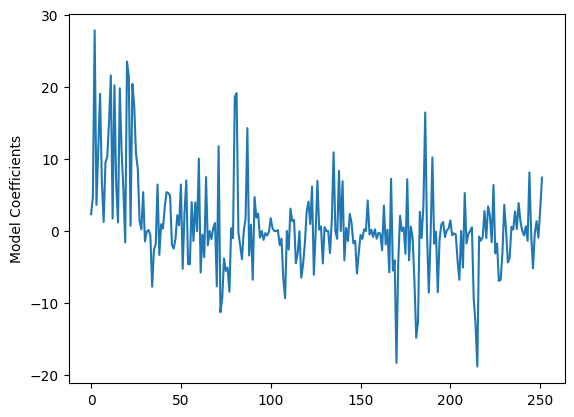

In [11]:
ridge = Ridge(alpha = 50) ## vary alpha between 0, 1e-15, 1e-12, 1, 1000 and observe the variation of model coefficients
ridge.fit(X_train, y_train)
print("MSE Train:  ", mean_squared_error(ridge.predict(X_train), y_train))
print("MSE Test:  ", mean_squared_error(ridge.predict(X_test), y_test))
print("Mean model coefficient:  ", abs(ridge.coef_).mean())
print((ridge.coef_==0).sum(), " coefficients set to zero")
abs(ridge.coef_).max()
plt.plot(ridge.coef_);
plt.ylabel("Model Coefficients");

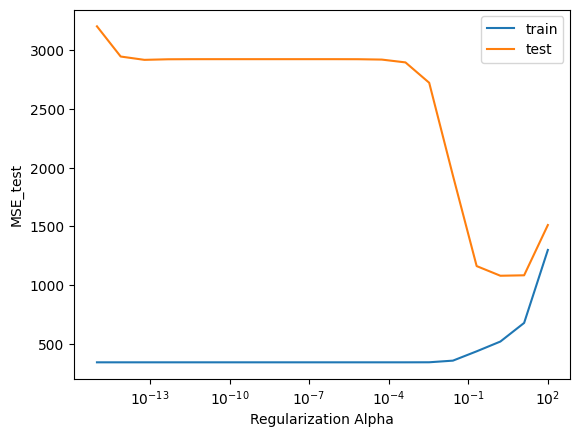

In [12]:
### optimize alpha for lowest MSE_test

mse_train = []
mse_test = []

alphas = 10.0**np.linspace(-15, 2, 20)
for i in alphas:
    ridge = Ridge(alpha = i)
    ridge.fit(X_train, y_train)
    mse_train.append(mean_squared_error(ridge.predict(X_train), y_train))
    mse_test.append(mean_squared_error(ridge.predict(X_test), y_test))
sns.lineplot(x = alphas, y = mse_train, label = "train")
sns.lineplot(x = alphas, y = mse_test, label = "test")
plt.xlabel('Regularization Alpha')
plt.xscale('log')
plt.ylabel('MSE_test');
plt.show()

MSE Train:   581.4523537422103
MSE Test:   1068.3784289844666
Mean model coefficient:   7.482868590547077
10  coefficients set to zero


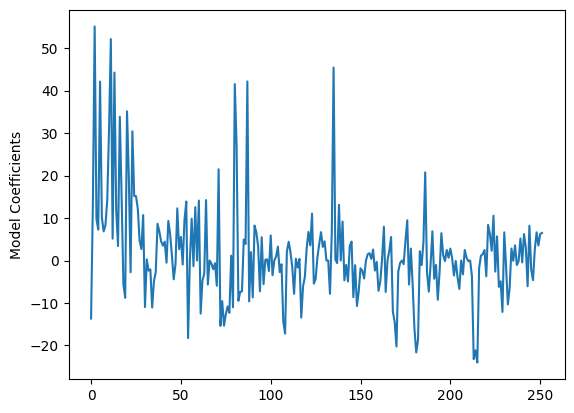

In [13]:
ridge = Ridge(alpha = 5) ## vary alpha between 0, 1e-15, 1e-12, 1, 1000 and observe the variation of model coefficients
ridge.fit(X_train, y_train)
print("MSE Train:  ", mean_squared_error(ridge.predict(X_train), y_train))
print("MSE Test:  ", mean_squared_error(ridge.predict(X_test), y_test))
print("Mean model coefficient:  ", abs(ridge.coef_).mean())
print((ridge.coef_==0).sum(), " coefficients set to zero")
abs(ridge.coef_).max()
plt.plot(ridge.coef_);
plt.ylabel("Model Coefficients");

### Lasso Model

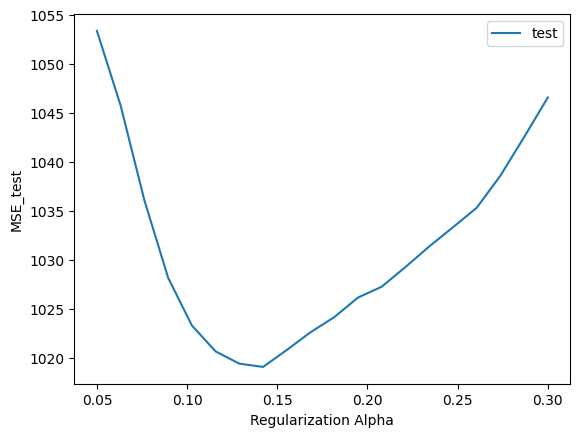

In [14]:
#### try the same approach with the Lasso algorithms

mse_train = []
mse_test = []

alphas = np.linspace(0.05, 0.3, 20)

for i in alphas:
    lasso = Lasso(alpha = i)
    lasso.fit(X_train, y_train)
    mse_train.append(mean_squared_error(lasso.predict(X_train), y_train))
    mse_test.append(mean_squared_error(lasso.predict(X_test), y_test))
#sns.lineplot(x = alphas, y = mse_train, label = "train")
sns.lineplot(x = alphas, y = mse_test, label = "test")
plt.xlabel('Regularization Alpha')
plt.ylabel('MSE_test');
plt.show()

MSE Train:   628.7274342047532
MSE Test:   1019.1037333035229
Mean model coefficient:   4.953975731829113
146  coefficients set to zero


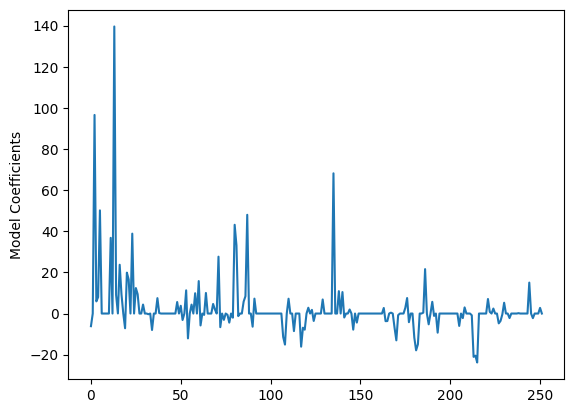

In [15]:
lasso = Lasso(alpha = 0.14) ## set alpha to 0 
lasso.fit(X_train, y_train)
print("MSE Train:  ", mean_squared_error(lasso.predict(X_train), y_train))
print("MSE Test:  ", mean_squared_error(lasso.predict(X_test), y_test))
print("Mean model coefficient:  ", abs(lasso.coef_).mean())
print((lasso.coef_==0).sum(), " coefficients set to zero")
abs(lasso.coef_).max()
plt.plot(lasso.coef_);
plt.ylabel("Model Coefficients");

In [16]:
(lasso.coef_==0).sum()

### lasso sets many coefficients to zero

146

## 3. Selecting Hyper-Parameters via Cross Validation

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" alt="Bias and Variance" width="500" height="500">


https://scikit-learn.org/stable/modules/cross_validation.html

The primary hyper-parameter for regularized regression is $\alpha$ (alpha). We can select the shrinkage parameter ($\alpha$) through cross-validation (CV). 

Cross validation (CV) is a resampling method:
1. Split the training data into k folds (lets say 5 for now).
2. Keep one of the fold for validation and train the model on the remainder of the training set
3. Score the model on the validation fold
4. Repeat for all folds
5. Compute the average score for each fols
6. Repeat 1 to 5 for different values of the selected hyperparameter
6. Note: you still need to test the final model on the test set


In [17]:
### Both Ridge and Lasso have a CV implementation in sklearn
## There is also a generic CV module

lassoModel = LassoCV(alphas = np.linspace(0.001, 0.4, 120), cv = 10).fit(X_train, y_train)
lassoModel.alpha_

optimalLassoAlpha = lassoModel.alpha_
print("Optimal lasso alpha: ", optimalLassoAlpha)

Optimal lasso alpha:  0.10829411764705883


MSE Train:   598.884724123658
MSE Test:   1021.9698456106383


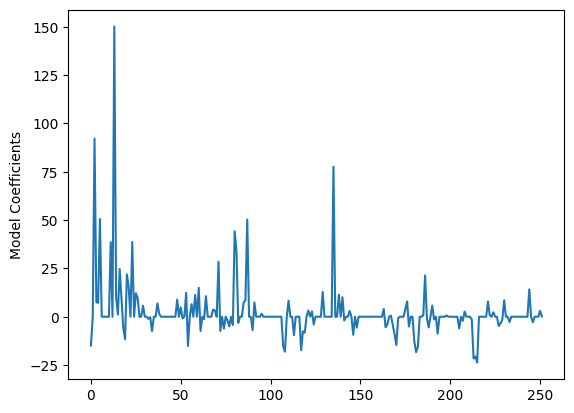

In [18]:
lasso = Lasso(alpha = optimalLassoAlpha)
lasso.fit(X_train, y_train)
print("MSE Train:  ", mean_squared_error(lasso.predict(X_train), y_train))
print("MSE Test:  ", mean_squared_error(lasso.predict(X_test), y_test))
abs(lasso.coef_).max()
plt.plot(lasso.coef_);
plt.ylabel("Model Coefficients");

## 4. Hyperparameter tuning using grid search

In [19]:
from sklearn.model_selection import GridSearchCV
lasso_tune = Lasso()
parameters = {'alpha':np.linspace(0.001, 0.4, 20), 'max_iter':[100, 1000, 5000, 10000]}
hyper_tune = GridSearchCV(lasso_tune, parameters, cv = 5, scoring = 'neg_root_mean_squared_error')

##### Scoring reference:
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [20]:
hyper_tune.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.001, 0.022, 0.043, 0.064, 0.085, 0.106, 0.127, 0.148, 0.169,
       0.19 , 0.211, 0.232, 0.253, 0.274, 0.295, 0.316, 0.337, 0.358,
       0.379, 0.4  ]),
                         'max_iter': [100, 1000, 5000, 10000]},
             scoring='neg_root_mean_squared_error')

In [21]:
hyper_tune.best_params_

{'alpha': 0.022000000000000002, 'max_iter': 1000}

In [22]:
lasso = Lasso(alpha = 0.022, max_iter=1000)
lasso.fit(X_train, y_train)
print("MSE Train:  ", mean_squared_error(lasso.predict(X_train), y_train))
print("MSE Test:  ", mean_squared_error(lasso.predict(X_test), y_test))

MSE Train:   409.47444642792874
MSE Test:   1457.052967137252


## 5. Pipelines in scikit-learn

- Pipeline is a series of transformation applied in one line of code.
- Pipelines are optional for prototype development but very useful in production where new data for prediction need to undergo a series of transformation (example: impute missing data |=> scaling |=> PCA |=> model fit)

We use the `Pipeline()` function to assemble the pipeline, and then use its `fit()` method to fit the pipeline to the specified data. 

In [23]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

# define the pieces to the pipeline
reg = Lasso(alpha=0.19, max_iter=1000)
scaler = MinMaxScaler()

# assemble the pipeline components and fit to data
pipe = Pipeline([("scale", scaler), ("fit_lasso_regression", reg)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', MinMaxScaler()),
                ('fit_lasso_regression', Lasso(alpha=0.19))])

In [24]:
pipe

Pipeline(steps=[('scale', MinMaxScaler()),
                ('fit_lasso_regression', Lasso(alpha=0.19))])

In [25]:
# get predictions from scikit-learn pipeline
pipe.predict(X_test[2:5])

array([ 92.98486631, 354.40596523, 170.68117316])

In [26]:
y_test[2:5]

array([ 82.5, 335. , 149.5])

### 6. Summary


- Bias-variance tradeoff 
- Regularization
- Hyperparameter tuning
- Cross-validation
- Pipelines